# Майнинг текстов, ФКН ВШЭ
## Оценка параметров закона Ципфа для научной и художественной литературы
### Шихова Арсения, группа БПМИ142

Пусть $p$ - частота слова в тексте, $r$ - его ранг, То есть самое частое слово имеет ранг $1$, второе по частоте - ранг $2$, и так далее.
Закон Ципфа для текстов гласит: $p = \frac{C}{r^\alpha}$, где $\alpha \to 1$. Моя задача заключается в том, чтобы методом линейной регрессии построить точечные оценки и доверительные интервалы для $C$ и $\alpha$.


Подробнее о законе Ципфа:
https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.164.8422&rep=rep1&type=pdf

На вход подаются два текста. В файле input.txt --- книга "Обитаемый остров" (вариант 1971 года) братьев Стругацких, в файле input2.txt --- гимн НИУ ВШЭ.

Импортируем все необходимые библиотеки и функции:

In [1]:
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from string import punctuation
from statsmodels.regression.linear_model import OLS
from statsmodels import api as sm
from math import log, e

Для первой книги составляем словарь: сколько раз встречается каждое слово в тексте и каков его ранг. Для приведения слова к его нормальной форме (лемме) используем программу <a href="https://tech.yandex.ru/mystem/">Mystem</a>.

In [2]:
words = {} # Words and their numbers of occurrences
m = Mystem()
f = open('input.txt', encoding="utf-8")
for line in f:
    line = "".join(symbol for symbol in line if symbol not in punctuation)
    for lemma in m.lemmatize(line):
        if lemma not in words:
            words[lemma] = 1
        else:
            words[lemma] = words[lemma] + 1
f.close()
            
words.pop(' ')
words.pop('\n')
ranked_words = sorted(list(words.keys()), key=lambda x: words[x], reverse=True)
N = len(ranked_words)
max_freq = max(words.values())

Построим график зависимости частоты от ранга слова:

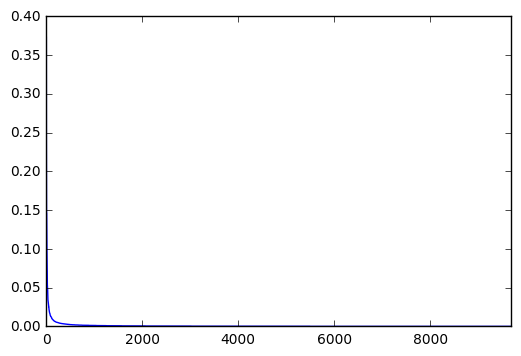

In [3]:
plt.plot(range(1, N + 1), [words[i] / N for i in ranked_words])
plt.xlim(0, N + 1)
plt.ylim(0)
plt.show()

Строим линейную регрессию $\ln(p) = w_0 + w_1 \cdot \ln(r)$. Тогда $C = e^{w_0}$, $\alpha = -w_1$.

In [4]:
y = [words[i] / N for i in ranked_words]
y = [log(item) for item in y]
X = [[log(i)] for i in range(1, N + 1)]
X = sm.add_constant(X)
lm = OLS(y, X)
model = lm.fit()
alpha, С = model.params 
С = e ** С; alpha = -alpha
С_l, С_r = e ** model.conf_int()[1][0], e ** model.conf_int()[1][1]
alpha_l, alpha_r = -model.conf_int()[0][1], -model.conf_int()[0][0]
print("С =", С)
print("alpha =", alpha)
print("Доверительный интервал для С: (", С_l, С_r, ")")
print("Доверительный интервал для alpha: (", alpha_l, alpha_r, ")")

С = 0.321417950182
alpha = -1.04628706354
Доверительный интервал для С: ( 0.320282959781 0.322556962663 )
Доверительный интервал для alpha: ( -1.07543638038 -1.0171377467 )


И то же самое для второй книги:

In [5]:
words2 = {} # Words and their numbers of occurrences
m2 = Mystem()
f = open('input2.txt', encoding="utf-8")
for line in f:
    line = "".join(symbol for symbol in line if symbol not in punctuation)
    for lemma in m2.lemmatize(line):
        if lemma not in words2:
            words2[lemma] = 1
        else:
            words2[lemma] = words2[lemma] + 1
f.close()
            
words2.pop(' ')
words2.pop('\n')
ranked_words2 = sorted(list(words2.keys()), key=lambda x: words2[x], reverse=True)
N2 = len(ranked_words2)
max_freq2 = max(words2.values())

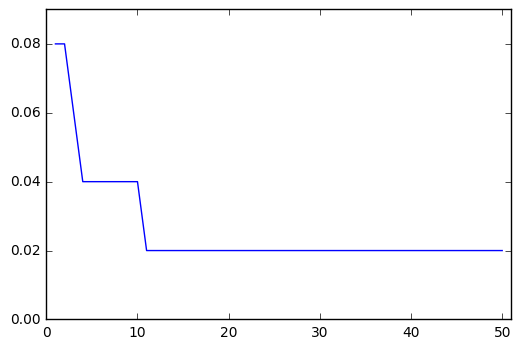

In [6]:
plt.plot(range(1, N2 + 1), [words2[i] / N2 for i in ranked_words2])
plt.xlim(0, N2 + 1)
plt.ylim(0)
plt.show()

In [7]:
y2 = [words2[i] / N2 for i in ranked_words2]
y2 = [log(item) for item in y2]
X2 = [[log(i)] for i in range(1, N2 + 1)]
X2 = sm.add_constant(X2)
lm2 = OLS(y2, X2)
model2 = lm2.fit()
alpha2, С2 = model2.params 
С2 = e ** С2; alpha2 = -alpha2
С2_l, С2_r = e ** model2.conf_int()[1][0], e ** model2.conf_int()[1][1]
alpha2_l, alpha2_r = -model2.conf_int()[0][1], -model2.conf_int()[0][0]
print("С =", С2)
print("alpha =", alpha2)
print("Доверительный интервал для С: (", С2_l, С2_r, ")")
print("Доверительный интервал для alpha: (", alpha2_l, alpha2_r, ")")

С = 0.68762138001
alpha = 2.6254096835
Доверительный интервал для С: ( 0.649975948144 0.727447167233 )
Доверительный интервал для alpha: ( 2.45102434568 2.79979502132 )
